# STA 141B Assignment 3

Due __Feb 11, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using web APIs and combining data from multiple sources.

## USDA Food Composition

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores. We've cleaned and merged the fruit and vegetable price estimates for you. The result is the `fresh.csv` file included in the repository.

In this assignment, you'll combine the price estimates with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list), and then analyze the resulting dataset.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it's a good idea to use caching.

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any data.gov API. You may need the key again later in the quarter, so make sure you save it.

In [465]:
# load packages:

import numpy as np
import pandas as pd
import requests
import requests_cache
import time
from plotnine import *
requests_cache.install_cache('hw3_cache')

In [502]:
# read the data:
fresh = pd.read_csv('fresh.csv')
fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.316639,0.52,0.330693,0.201366,watermelon,fruit
1,Fresh1,0.520794,0.51,0.374786,0.382718,cantaloupe,fruit
2,Fresh1,1.480396,0.74,0.407855,0.815929,tangerines,fruit
3,Fresh1,2.508450,0.94,0.319670,0.853060,strawberries,fruit
4,Fresh1,1.987999,0.94,0.363763,0.769319,plums,fruit


__Exercise 1.1__

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` might return this list:

```python
[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'ds': 'SR',
  'manu': 'none'}]
```

As usual, make sure you document and test your function.

In [3]:
# define my loading key function
def read_key(x):
    '''
    This function take the file path as an input,and will return to a string in the file
    which is actually the API key I going to use.
    
    '''
    with open(x) as file:
        return file.readline().strip('\n')


# read my key:
key = read_key('C:\\Users\\RockyYin\\Documents\\Py_For_STA141B\\USDA_key.txt')


# Define the search function:
def ndb_search(term):
    '''
    This function is used to access the ndb api and return to the searching result.
    
    The input should be the name of the product to be searched
    
    Treating the imput as a keyword, the output is a list of all the product whose name 
    contains the key word.
    
    '''
    
#     Get the result:
    response = requests.get('https://api.nal.usda.gov/ndb/search', params={
    'api_key': key,
    'q': term
    })
    
#     Change the format as json.
    rs = response.json()
    
#     judge if there is result we want.
    if 'errors' in rs:
#         if the search result returns to errors, then the function return to an empty list.
        a = []
        return a
    
    else:
        return rs['list']['item']

    
    
# Test my function:
ndb_search('eggs')
# works well.

[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'CADBURY CREME EGG CHOCOLATE EGG HOLLOW EGG, UNPREPARED, GTIN: 07622210355898',
  'ndbno': '45376005',
  'ds': 'GDSN',
  'manu': 'Mondelez EU B2B2C'},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'VEGGIE EGG WHITE ENGLISH MUFFIN EGG WHITES WITH TOMATO, SPINACH AND REDUCED FAT CHEESE ON AN ENGLISH MUFFIN, UPC: 013800761224',
  'ndbno': '45278156',
  'ds': 'LI',
  'manu': 'Nestle Usa-Frozen Food Division'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GREAT EGG-SPECTATIONS REAL EGG PRODUCT, UPC: 018894318958',
  'ndbno': '45291098',
  'ds': 'LI',
  'manu': 'Big Y Foods, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'CAGE FREE EGGS-GRADE A-BROWN ONE DOZEN EGGS LARGE, UPC: 036800133303',
  'ndbno': '45355493',
  'ds': 'LI',
  'manu': 'Topco Associates, Inc.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'WIDE EGG 

__Exercise 1.2__

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* The [Python](https://docs.python.org/3/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) string methods are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [196]:
# check the terms:

terms = fresh['food']
terms = terms.str.replace('_',' ')
terms.head()

0      watermelon
1      cantaloupe
2      tangerines
3    strawberries
4           plums
Name: food, dtype: object

In [451]:

# Initialize an empty data frame:
df = pd.DataFrame(None)

i = 1



#  load all the restult by using my ndv_search function and combine all the output in a dataframe.
for item in terms:
#     print('now searching:', item) # Function test sentence.
#     print('i=',i)
    i = i+1
    search = pd.DataFrame(ndb_search(item))
    
#     Add a column to show the product searched.
    search['term'] = item
    
#     filter 1: raw product
    temp = search[search['name'].str.contains(' raw')]
    
    
#     filter 2: manu should be none
    temp = temp[temp['manu']== 'none']
    
#     Now the problem is still have some fruit juice product
#     Add filter 3:
    temp = temp[~temp['name'].str.contains('juice')]
    
#     Next since each searching result can have multiple results, take the one have the shortest 
#     name as the general product.
    
    
    temp['length'] = temp['name'].str.strip(' ').str.len()
#     print('raw result:', temp,'\n') # Show the process. 
    if len(temp) == 0:
        continue
    else:
        idx_min = temp['length'].idxmin()
#         print('index of the string:',idx_min)
    final_result = temp.loc[idx_min,]
    
#     Add to the data frame:
    df = df.append(final_result)

# Reset the index to the term:
df = df.set_index('term')

# fix the data type:
df[['length','offset']] = df[['length','offset']].astype(int)
df
my_ndbno = df[['ndbno','group']]
my_ndbno


,ndbno,group
term,,
watermelon,09326,Fruits and Fruit Juices
cantaloupe,09181,Fruits and Fruit Juices
tangerines,09218,Fruits and Fruit Juices
strawberries,09316,Fruits and Fruit Juices
plums,09279,Fruits and Fruit Juices
oranges,09216,Fruits and Fruit Juices
raspberries,09302,Fruits and Fruit Juices
pomegranate,09286,Fruits and Fruit Juices
pineapple,09266,Fruits and Fruit Juices


There are several problems I need to fix:
1. The terms for the product have some special symbols like '_', which will lead to null returning for the searching result.
2. For each searching result, it may have the product whose name has the key word but actually is product treat the fruit or vegetable as one of ingredients.
3. Some fruits and vegetables have different kinds and origin, so it is neccessary to find a strategy to get the product I really want.


To fix these problems, I used strategies as following:

1. Set up filter in my code. Setting up filter means I set up some key words for the name of the product and manufactuer. More specifically, 
    - I ask the content in'name' column must contains ' raw', which helps me get the data of the raw product.
    - Second filter is for manufaturer. To get the raw data, there should not be any manufacturer for the product, since I am searching for the fruit itself instead of any product made by it. So I set the manufaturer should be 'none'.
    - After the filters above, there are still some results I don'treally need. Since the group for the result after filtered twice are erither 'fruit and juice' or 'vegetables and vegetables product', I add the third filter which is the name of the result should not contain key word 'juice'.
    
2. After all the filters above have worked, I basically get the results I want. The only problem is some fruit or vegetables may have different varities which leads to mutiple results for a single product even though all of them are meaningful. But I still want to get the result more precise or get the result for the fruit in 'general meaning' instead of some specific species. So to achieve this target, I sort the result in each iteration by the length of the product name. The name has the shortest length will be treated as the fruit in general. And according to the results I get, this strategy seems works well.

__Exercise 1.3__

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}
```

Be sure to document and test your function.

In [499]:
def ndb_report(ndbno):
    
    '''
    The input should be the ndb No. of the product to be searched.
    BUT, the input should have the type of 'string'
    
    The output is the nurtrient information of the product. And the type of the output is a list
    
    '''
    
#      Get the raw data:
    response = requests.get('https://api.nal.usda.gov/ndb/V2/reports',params={
        'api_key':key,
        'ndbno':ndbno,
        'type':'b'
    })
    
    response.raise_for_status()
    
#     Read as json.
    result = response.json()
    
#     Get the 'foods' list
    ls = result['foods']
    
#     Get the element in the dictionary.
    return ls[0]['food']['nutrients']
#     return ls


# Test ndb_report function:
ndb_report('09279')
# Seems work well.

[{'nutrient_id': '255',
  'name': 'Water',
  'derivation': 'NONE',
  'group': 'Proximates',
  'unit': 'g',
  'value': '87.23',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '143.93'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '57.57'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '131.72'}]},
 {'nutrient_id': '208',
  'name': 'Energy',
  'derivation': 'NC',
  'group': 'Proximates',
  'unit': 'kcal',
  'value': '46',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '76'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '30'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '69'}]},
 {'nutrient_id': '203',
  'name': 'Protein',
  'derivation': 'NONE',
  'group': 'Proximates',


__Exercise 1.4.__

Answer any two of the questions below. For each answer, state the question, write 2-3 paragraphs, and support your conclusions with plots.

 If you like, you can replace one question with a question you came up with on your own.

* Are fruits typically higher in kilocalories, or vegetables?
* How does yield for fibrous foods (high in dietary fiber) compare to other foods?
* Which food provides the widest variety of nutrients?
* Which nutrients are the most expensive?
* Which foods are the best value for the price? "Best value" might mean highest yield per dollar, most kilocalories per dollar, or some other reasonable definition.
* How do the price distributions compare for fruits and vegetables?

In [473]:
myno = my_ndbno.reset_index()
myno.head()

,term,ndbno,group
0,watermelon,09326,Fruits and Fruit Juices
1,cantaloupe,09181,Fruits and Fruit Juices
2,tangerines,09218,Fruits and Fruit Juices
3,strawberries,09316,Fruits and Fruit Juices
4,plums,09279,Fruits and Fruit Juices


In [568]:
# Define a function to get the nutrient information by searching its ndb no
def get_nutri(ndbno):
    
    '''
    This function still takes ndb no as input.
    
    The main function is to get the nutrients information and return to a dataframe with the format
    that the nutrient names are the column names.
    
    After using the function, the dataframe as output should be easy to deal with and paste all the 
    result of each product in 'fresh' file conviniently.
    
    
    '''
    df = pd.DataFrame([])
    temp = pd.DataFrame(ndb_report(ndbno))
    term = myno['term'][myno['ndbno']==ndbno]
    temp['term'] = term.iloc[0]
    temp['group'] = myno['group'][myno['ndbno']==ndbno].iloc[0]
    temp = temp[['name','value','term','group']]
    df = temp
    df = df.set_index(['term','name','group']).stack()
    df = df.unstack(1).reset_index()
    return df

# Initialize a null df:
rs = pd.DataFrame([])

# Get all info in one df by using for loop:
for ndbno in myno['ndbno']:
    mytemp = get_nutri(ndbno)
    rs = rs.append(mytemp)

# Set the the product name as index
rs = rs.set_index(['term','group'])
rs = rs.reset_index().drop('level_2', axis= 1)
rs.head()


,term,group,Caffeine,"Calcium, Ca","Carbohydrate, by difference",Cholesterol,Energy,"Fatty acids, total monounsaturated","Fatty acids, total polyunsaturated","Fatty acids, total saturated",...,"Vitamin A, RAE",Vitamin B-12,Vitamin B-6,"Vitamin C, total ascorbic acid",Vitamin D,Vitamin D (D2 + D3),Vitamin E (alpha-tocopherol),Vitamin K (phylloquinone),Water,"Zinc, Zn"
0,watermelon,Fruits and Fruit Juices,0,7,7.55,0,30,0.037,0.050,0.016,...,28,0.00,0.045,8.1,0,0.0,0.05,0.1,91.45,0.10
1,cantaloupe,Fruits and Fruit Juices,0,9,8.16,0,34,0.003,0.081,0.051,...,169,0.00,0.072,36.7,0,0.0,0.05,2.5,90.15,0.18
2,tangerines,Fruits and Fruit Juices,0,37,13.34,0,53,0.060,0.065,0.039,...,34,0.00,0.078,26.7,0,0.0,0.20,0.0,85.17,0.07
3,strawberries,Fruits and Fruit Juices,0,16,7.68,0,32,0.043,0.155,0.015,...,1,0.00,0.047,58.8,0,0.0,0.29,2.2,90.95,0.14
4,plums,Fruits and Fruit Juices,0,6,11.42,0,46,0.134,0.044,0.017,...,17,0.00,0.029,9.5,0,0.0,0.26,6.4,87.23,0.10


### Which kind of product is higher in calorie?

In [463]:
%matplotlib inline

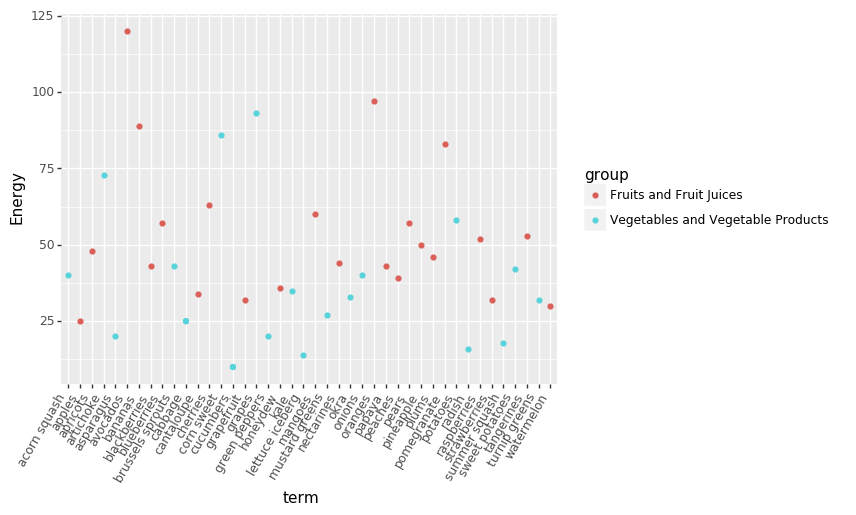

<ggplot: (-9223371931199668143)>

In [501]:
(ggplot(rs,aes(x = 'term',y = 'Energy',color= 'group'))+geom_point(aes(color = 'group'))+
 theme(axis_text_x=element_text(rotation=60, hjust=1)))

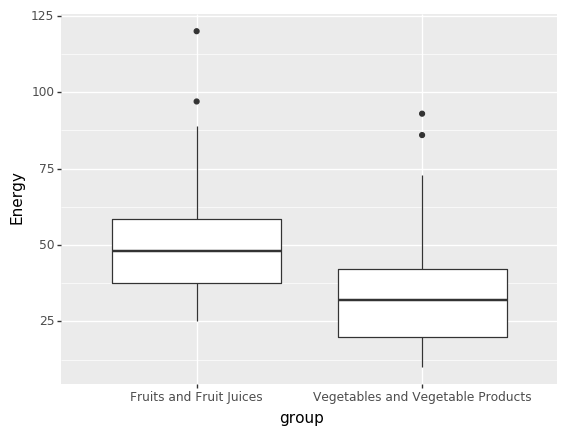

<ggplot: (-9223371931199837401)>

In [485]:
# To let boxplot work, change the data type of "energy" into 'float'
rs['Energy'] = rs['Energy'].astype(float)
ggplot(rs,aes(x = 'group', y = 'Energy'))+ geom_boxplot()

From the scatter plot, basically we can get the overall image that most fruits contain more calorie than vagetables do. To draw the conclusion more precisely, I draw a box plot.

According to the boxplot, it is reasonbly to say usually, fruits contain more calorie than vegetables.

### Which foods are the best value for the price?


To answer this question, I will quantify 'best value' by the price per calorie. That means by spending the same money, one can get more calorie in the certain food than the others.

In [570]:
rs.rename(columns={ 'term': "food" }, inplace=True)
rs

,food,group,Caffeine,"Calcium, Ca","Carbohydrate, by difference",Cholesterol,Energy,"Fatty acids, total monounsaturated","Fatty acids, total polyunsaturated","Fatty acids, total saturated",...,"Vitamin A, RAE",Vitamin B-12,Vitamin B-6,"Vitamin C, total ascorbic acid",Vitamin D,Vitamin D (D2 + D3),Vitamin E (alpha-tocopherol),Vitamin K (phylloquinone),Water,"Zinc, Zn"
0,watermelon,Fruits and Fruit Juices,0,7,7.55,0,30,0.037,0.050,0.016,...,28,0.00,0.045,8.1,0,0.0,0.05,0.1,91.45,0.10
1,cantaloupe,Fruits and Fruit Juices,0,9,8.16,0,34,0.003,0.081,0.051,...,169,0.00,0.072,36.7,0,0.0,0.05,2.5,90.15,0.18
2,tangerines,Fruits and Fruit Juices,0,37,13.34,0,53,0.060,0.065,0.039,...,34,0.00,0.078,26.7,0,0.0,0.20,0.0,85.17,0.07
3,strawberries,Fruits and Fruit Juices,0,16,7.68,0,32,0.043,0.155,0.015,...,1,0.00,0.047,58.8,0,0.0,0.29,2.2,90.95,0.14
4,plums,Fruits and Fruit Juices,0,6,11.42,0,46,0.134,0.044,0.017,...,17,0.00,0.029,9.5,0,0.0,0.26,6.4,87.23,0.10
5,oranges,Fruits and Fruit Juices,NaN,161,25.00,0,97,0.036,0.040,0.024,...,21,0.00,0.176,136.0,NaN,NaN,0.25,NaN,72.50,0.25
6,raspberries,Fruits and Fruit Juices,0,25,11.94,0,52,0.064,0.375,0.019,...,2,0.00,0.055,26.2,0,0.0,0.87,7.8,85.75,0.42
7,pomegranate,Fruits and Fruit Juices,0,10,18.70,0,83,0.093,0.079,0.120,...,0,0.00,0.075,10.2,0,0.0,0.60,16.4,77.93,0.35
8,pineapple,Fruits and Fruit Juices,0,13,13.12,0,50,0.013,0.040,0.009,...,3,0.00,0.112,47.8,0,0.0,0.02,0.7,86.00,0.12
9,apricots,Fruits and Fruit Juices,0,13,11.12,0,48,0.170,0.077,0.027,...,96,0.00,0.054,10.0,0,0.0,0.89,3.3,86.35,0.20


In [613]:
# Get the price per lb and merge it into my nutrient df:
fresh = pd.read_csv('fresh.csv')

# Merge two data sets.
rs_price = pd.merge(rs,fresh, on = 'food')

# Get part of the data set:
energy_price = rs_price[['food','Energy','price_per_lb','group']]

# Change the data type.
energy_price['Energy']=energy_price['Energy'].astype(float)
energy_price['price_per_calorie'] = energy_price['price_per_lb']/energy_price['Energy']
energy_price.head()

C:\Users\RockyYin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RockyYin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,food,Energy,price_per_lb,group,price_per_calorie
0,watermelon,30.0,0.316639,Fruits and Fruit Juices,0.010555
1,cantaloupe,34.0,0.520794,Fruits and Fruit Juices,0.015317
2,tangerines,53.0,1.480396,Fruits and Fruit Juices,0.027932
3,strawberries,32.0,2.508450,Fruits and Fruit Juices,0.078389
4,plums,46.0,1.987999,Fruits and Fruit Juices,0.043217


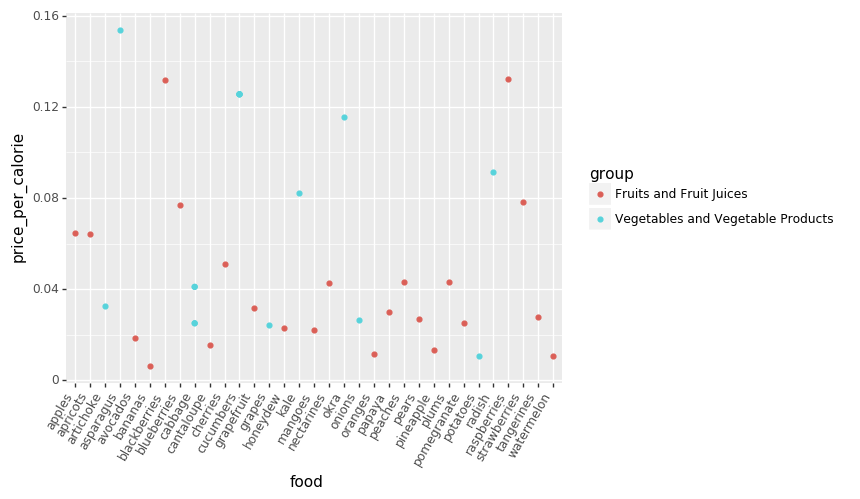

<ggplot: (-9223371931199159250)>

In [608]:
(ggplot(energy_price,aes(x ='food', y = 'price_per_calorie',color= 'group'))+geom_point()+
theme(axis_text_x=element_text(rotation=60, hjust=1)))



In [612]:
energy_price.sort_values('price_per_calorie', ascending = False).head(4)

,food,Energy,price_per_lb,group,price_per_calorie
23,asparagus,20.0,3.075611,Vegetables and Vegetable Products,0.153781
6,raspberries,52.0,6.877702,Fruits and Fruit Juices,0.132264
19,blackberries,43.0,5.661671,Fruits and Fruit Juices,0.131667
27,cucumbers,10.0,1.255586,Vegetables and Vegetable Products,0.125559
26,cucumbers,10.0,1.255586,Vegetables and Vegetable Products,0.125559


Combine the scatter plot and the chart above, we can find the top 4 'best value' foods are:
1. Asparagus
2. Raspberries
3. Blackberries
4. Cucumbers